# **BMEN 415 - Final Project - Mateo**
**Regression - HR-pQCT Data**

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Importing Training Data

In [97]:
df_train = pd.read_csv('regression_train.csv')
df_train = df_train.drop(df_train.columns[0:2], axis = 1)

#### One Hot Encode radial and tibial sites

In [98]:
df_ohe = pd.get_dummies(data = df_train, columns = ['site_r', 'site_t'])
df_ohe

,age,sex,ttbmd_r,tbbmd_r,tbbvtv_r,tbn_r,tbth_r,tbsp_r,ctbmd_r,ctpo_r,...,ctbmd_t,ctpo_t,ctth_t,ttar_t,tbar_t,ctar_t,site_r_Radius L,site_r_Radius R,site_t_Tibia L,site_t_Tibia R
0,78.4,0,209.0,116.3,16.0,1.248,0.215,0.794,734.4,1.60,...,632.4,4.85,1.097,763.9,667.3,102.1,1,0,1,0
1,73.6,1,247.0,135.9,17.7,1.296,0.246,0.759,832.5,1.25,...,849.3,4.51,1.660,732.7,588.9,149.2,0,1,1,0
2,21.7,0,319.9,143.4,19.5,1.427,0.209,0.665,941.4,0.11,...,957.4,0.43,1.337,622.1,513.6,113.4,1,0,1,0
3,68.3,0,246.4,92.9,12.4,1.067,0.230,0.930,854.6,1.65,...,759.1,6.87,1.391,723.2,602.8,125.8,0,1,1,0
4,68.1,0,271.5,85.2,11.2,1.033,0.203,0.946,898.0,0.67,...,882.9,2.51,1.359,545.4,442.4,107.8,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,42.0,0,364.1,128.3,17.1,1.160,0.233,0.850,1003.9,0.23,...,939.5,1.44,1.602,686.8,549.8,142.3,1,0,1,0
156,43.4,1,504.2,92.9,11.9,1.105,0.197,0.864,1069.8,0.71,...,1043.8,0.24,1.831,394.3,278.5,119.7,1,0,1,0
157,22.9,0,335.2,111.8,15.6,1.119,0.209,0.856,945.8,0.11,...,961.5,0.70,1.402,571.9,463.0,113.7,1,0,1,0
158,42.8,1,423.4,199.6,27.9,1.462,0.249,0.622,958.1,1.03,...,941.0,1.98,1.932,737.9,563.5,180.0,1,0,1,0


#### Correlation Heat Map

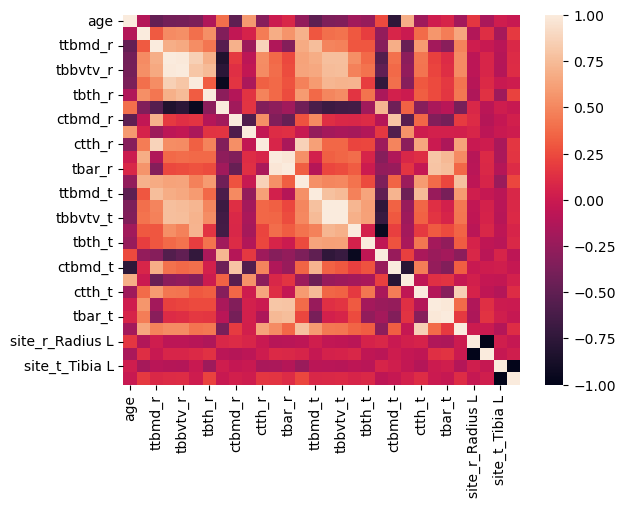

In [99]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

correlations = df_ohe.corr()
sns.heatmap(correlations)
plt.show()

#### Split Training Datasets into dependent and independent

In [100]:
x = df_ohe.drop(columns = ['ttbmd_r'])
y = pd.DataFrame(df_ohe['ttbmd_r'], columns = ['ttbmd_r'])


Feature Scaling

In [101]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

#### Train models

In [102]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.cross_decomposition import PLSRegression

version = 'bagging'

if version == 'SVM':
    model = SVR(kernel = 'linear')
elif version == 'bagging':
    model = BaggingRegressor() 
elif version == 'PLS':
    model = PLSRegression() 

model.fit(x, y)
print(f'Used model: {model}')
print(f'R2 of model to its training set: {model.score(x,y)}')




Used model: BaggingRegressor()
R2 of model to its training set: 0.9763594204990603


c:\Users\mateo\miniconda3\envs\py3.10\lib\site-packages\sklearn\ensemble\_bagging.py:470: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


## Import test set

In [103]:
df_test = pd.read_csv('regression_test.csv')
df_test = df_test.drop(df_test.columns[0:2], axis = 1)


#one hot encode radial and tibial sites
df_test_ohe = pd.get_dummies(data = df_test, columns = ['site_r', 'site_t'])

#Split into x and y
x_test = df_test_ohe.drop(columns = ['ttbmd_r'])
y_test = pd.DataFrame(df_test_ohe['ttbmd_r'], columns = ['ttbmd_r'])

#### Linear fit comparing actual and predicted values

In [104]:
x_test = sc_x.transform(x_test)
predicted = sc_y.inverse_transform(model.predict(x_test).reshape(-1, 1))
df_predicted = pd.DataFrame(predicted, columns = ['y Predicted'])

df_predict = pd.concat([df_predicted, y_test], axis = 1)
df_predict.columns = ['y Predicted', 'y Actual']
df_predict

,y Predicted,y Actual
0,410.52,410.7
1,304.23,297.9
2,338.86,341.7
3,310.87,342.7
4,406.68,433.9
5,391.46,404.2
6,246.19,220.2
7,398.43,439.0
8,429.70,450.2
9,304.91,303.8


R2 Score using bagging: 0.859213829537626


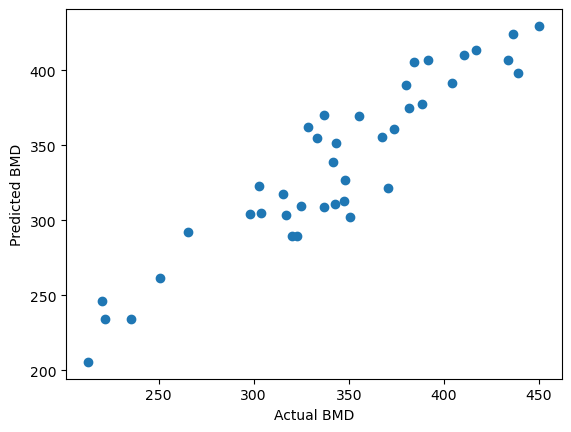

In [105]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

df_predict.plot(y = 'y Predicted', x = 'y Actual', style='o', ylabel = 'Predicted BMD', xlabel = 'Actual BMD', legend = '')
R2 = r2_score(df_predict['y Actual'], df_predict['y Predicted'])
print(f"R2 Score using {version}: {R2}")